In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [7]:
fileData = open('CitibikeTripsWeather.csv','r')

dic = collections.defaultdict(int)
days = collections.defaultdict(list)


In [8]:
bucket = 3
data = fileData.readline()
data = data.split(',')
print data[10]
lines = fileData.readlines()
for val in lines:
    val = val.split(',')
    #print val
    if float(val[12]) > 0.0:
        #print val[10]
        dic[int(float(val[12])/bucket)] += 1
        
        date = parse(val[1])
        string = str(date.month)+'/'+str(date.day)+'/'+str(date.year)
        if string not in days[int(float(val[12])/bucket)]:
            days[int(float(val[12])/bucket)].append(string)
            
#print days

prcp


In [9]:
prcp = sorted(dic)
print prcp

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [10]:
result = []

print days
for each_prcp in prcp:
    #print len(days[each_prcp])
    result.append(dic[each_prcp]/len(days[each_prcp]))
for i in range(len(prcp)):
    prcp[i] = str(prcp[i]*2) + '-' + str(((prcp[i]+1)*2)-1)
print prcp
print result

defaultdict(<type 'list'>, {3: ['1/7/2014', '1/22/2014', '2/20/2015'], 4: ['1/3/2014', '1/23/2014', '1/8/2015', '2/13/2015', '2/15/2015', '2/16/2015', '2/24/2015'], 5: ['1/8/2014', '1/24/2014', '1/28/2014', '2/28/2014', '1/7/2015', '2/19/2015'], 6: ['1/4/2014', '1/29/2014', '2/12/2014', '1/6/2015', '1/10/2015', '1/31/2015', '2/3/2015', '2/6/2015', '2/17/2015', '3/6/2015'], 7: ['1/21/2014', '1/25/2014', '1/30/2014', '2/11/2014', '3/4/2014', '3/6/2014', '2/21/2015', '2/23/2015', '2/28/2015'], 8: ['11/24/2013', '12/12/2013', '12/25/2013', '12/31/2013', '1/2/2014', '1/26/2014', '2/6/2014', '2/8/2014', '2/9/2014', '2/10/2014', '2/16/2014', '2/17/2014', '2/26/2014', '2/27/2014', '3/3/2014', '3/13/2014', '1/9/2015', '1/13/2015', '1/14/2015', '1/17/2015', '1/26/2015', '1/27/2015', '1/28/2015', '2/2/2015', '2/14/2015', '2/18/2015', '2/26/2015', '2/27/2015'], 9: ['11/25/2013', '12/13/2013', '12/14/2013', '12/16/2013', '12/17/2013', '1/1/2014', '1/9/2014', '2/4/2014', '2/7/2014', '2/25/2014', '3/

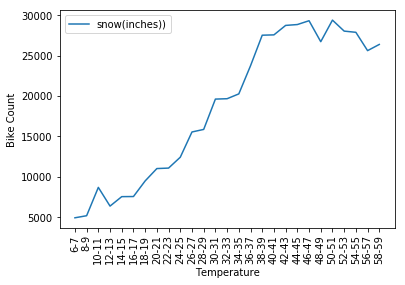

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(result, label = "snow(inches))")
plt.xticks([i for i in range(len(prcp))], prcp, rotation='vertical')

plt.ylabel('Bike Count')
plt.xlabel('Temperature')
plt.legend()
plt.show()
plt.savefig('Weather.png')